In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import math

%matplotlib inline

In [2]:
train_DataSet=h5py.File('Coursera/train_catvnoncat.h5','r')
train_set_x_Orig = np.array(train_DataSet["train_set_x"][:])
train_set_y_Orig = np.array(train_DataSet["train_set_y"][:])

In [3]:
test_DataSet=h5py.File('Coursera/test_catvnoncat.h5','r')
test_set_x_Orig = np.array(test_DataSet["test_set_x"][:])
test_set_y_Orig = np.array(test_DataSet["test_set_y"][:])

In [4]:
 classes = np.array(test_DataSet["list_classes"][:])

In [5]:
train_set_y_Orig = train_set_y_Orig.reshape((1, train_set_y_Orig.shape[0]))
test_set_y_Orig = test_set_y_Orig.reshape((1, test_set_y_Orig.shape[0]))

In [6]:
print(train_set_y_Orig)

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


y = [0], it's a 'non-cat' picture.


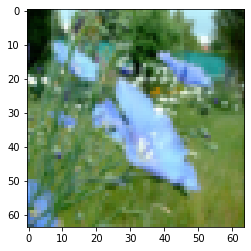

In [7]:
index=20
plt.imshow(train_set_x_Orig[index])
print ("y = " + str(train_set_y_Orig[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y_Orig[:, index])].decode("utf-8") +  "' picture.")

In [8]:
#matrix/vector dimensions
m_train = len(train_set_x_Orig)
m_test = len(test_set_x_Orig)
num_px = train_set_x_Orig.shape[1]

In [9]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_Orig.shape))
print ("train_set_y shape: " + str(train_set_y_Orig.shape))
print ("test_set_x shape: " + str(test_set_x_Orig.shape))
print ("test_set_y shape: " + str(test_set_y_Orig.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [10]:
#reshaping Image
# flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗∗ c ∗∗ d, a) is to use:
# X_flatten = X.reshape(X.shape[0], -1).T
train_set_x_Flatten=train_set_x_Orig.reshape(train_set_x_Orig.shape[0],-1).T
test_set_x_Flatten=test_set_x_Orig.reshape(test_set_x_Orig.shape[0],-1).T

In [11]:
print ("train_set_x_flatten shape: " + str(train_set_x_Flatten.shape))
print ("train_set_y shape: " + str(train_set_y_Orig.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_Flatten.shape))
print ("test_set_y shape: " + str(test_set_y_Orig.shape))
print ("sanity check after reshaping: " + str(train_set_x_Flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [12]:
#Flatening
print("Training Set X Org before Flateening" + str(train_set_x_Orig.shape))
print("Test Set X Org before Flateening" + str(test_set_x_Orig.shape))
train_set_x_Orig = train_set_x_Flatten/255.
test_set_x_Orig = test_set_x_Flatten/255.
print("Training Set X Org After Flateening" + str(train_set_x_Orig.shape))
print("Test Set X Org After Flateening" + str(test_set_x_Orig.shape))

Training Set X Org before Flateening(209, 64, 64, 3)
Test Set X Org before Flateening(50, 64, 64, 3)
Training Set X Org After Flateening(12288, 209)
Test Set X Org After Flateening(12288, 50)


In [13]:
#What you need to remember:

#Common steps for pre-processing a new dataset are:
    #Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
    #Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
    #"Standardize" the data
    

In [14]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))   
    return s

In [15]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [16]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [17]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [18]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    #cost = (-1/m)*(np.sum(np.multiply(Y,np.log(A)),np.multiply(1-Y,np.log(1-A))))     
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [19]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [20]:
# GRADED FUNCTION: optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """"
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):       
        grads, cost = propagate(w, b, X, Y)       
        dw = grads["dw"]
        db = grads["db"]

        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [21]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [22]:
# GRADED FUNCTION: predict

def predict(w, b, X):
  
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))    
    return Y_prediction

In [23]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [24]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

   
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [25]:
d = model(train_set_x_Orig, train_set_y_Orig, test_set_x_Orig, test_set_y_Orig, num_iterations = 5000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219
Cost

y = 1, you predicted that it is a "cat" picture.


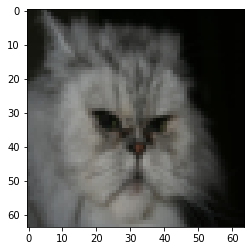

In [26]:
index = 12
plt.imshow(test_set_x_Orig[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y_Orig[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"].astype(int)[0,index]].decode("utf-8") +  "\" picture.")

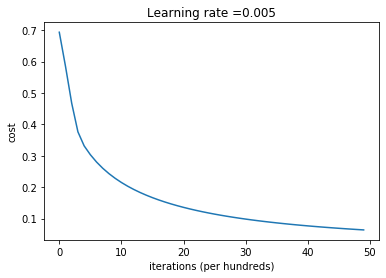

In [27]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

g:\computational neural networks for vision recognition\cnn\venv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


It's a Cat


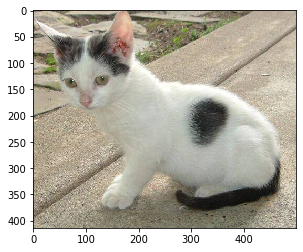

In [47]:
my_image = "dogs-vs-cats/train/Cat/cat.3.jpg"  

# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(plt.imread(fname))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
#print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image))].decode("utf-8") +  "\" picture.")

if int(my_predicted_image)==0:
    print("It's a Cat")
else:
    print("it's a non Cat")